In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("covid19-global-forecasting-week-2/data/train.csv")
#WHS stands for World Health System
WHS = pd.read_csv("covid19-global-forecasting-week-2/data/2.12_Health_systems.csv")

In [135]:
print(data.shape)
print(len(data.Country_Region.unique()))
print(data.Country_Region.unique())
data.head(25)


print(data[data.Country_Region == "China"])

(16464, 6)
173
['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria'
 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh' 'Barbados' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Brazil' 'Brunei' 'Bulgaria' 'Burkina Faso' 'Cabo Verde' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)' 'Costa Rica'
 "Cote d'Ivoire" 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark'
 'Diamond Princess' 'Djibouti' 'Dominica' 'Dominican Republic' 'Ecuador'
 'Egypt' 'El Salvador' 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini'
 'Ethiopia' 'Fiji' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Grenada' 'Guatemala' 'Guinea' 'Guinea-Bissau' 'Guyana'
 'Haiti' 'Holy See' 'Honduras' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica' 'Japan' 'Jordan'
 'Kazakhstan' 'Keny

In [195]:
data = data.query("Date>'2020-01-22'and Date<='2020-03-18'")

timestamps = []
countries = []
provinces = []
confirmed_cases = []
fatalities = []

vector_df = pd.DataFrame(columns=["Country_Region", "Province_State", "Confirmed_Cases", "Fatalities"])

for country in data.Country_Region.unique():
    for province in data.query(f'Country_Region=="{country}"').Province_State.unique():
        countries.append(country)
        provinces.append(province)
        if str(province) == "nan":
            temp_df = data.query(f'Country_Region=="{country}"')
        else:
            temp_df = data.query(f'Country_Region=="{country}" and Province_State =="{province}"')
        confirmed_cases.append([float(x) for x in temp_df["ConfirmedCases"]])
        fatalities.append([float(x) for x in temp_df["Fatalities"]])
        
        
vector_df.Country_Region = countries
vector_df.Province_State = provinces
vector_df.Confirmed_Cases = confirmed_cases 
vector_df.Fatalities = fatalities; vector_df.head(5)

print(len(confirmed_cases))
timestamps = list(data[data.Country_Region == "Albania"]["Date"])
print(len(timestamps))

294
56


In [143]:
df = vector_df.merge(WHS, on=['Country_Region', 'Province_State'], how = "left") ; df.head(5)

,Country_Region,Province_State,Confirmed_Cases,Fatalities,World_Bank_Name,Health_exp_pct_GDP_2016,Health_exp_public_pct_2016,Health_exp_out_of_pocket_pct_2016,Health_exp_per_capita_USD_2016,per_capita_exp_PPP_2016,External_health_exp_pct_2016,Physicians_per_1000_2009-18,Nurse_midwife_per_1000_2009-18,Specialist_surgical_per_100000_2008-18,Completeness_of_birth_reg_2009-18,Completeness_of_death_reg_2008-16
0,Afghanistan,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Afghanistan,10.2,5.1,77.4,57.2,162.8,17.5,0.3,0.3,0.0,42.3,NaN
1,Albania,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Albania,6.7,41.4,58.0,271.5,759.7,0.7,1.2,3.6,11.6,98.4,53.0
2,Algeria,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Algeria,6.6,67.7,30.9,260.4,998.2,0.0,1.8,2.2,12.1,100.0,NaN
3,Andorra,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Andorra,10.4,49.1,41.7,3834.7,4978.7,NaN,3.3,4.0,83.1,100.0,80.0
4,Angola,NaN,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",Angola,2.9,44.1,35.2,95.2,185.8,3.6,0.2,1.3,NaN,25.0,NaN


In [144]:
print(f'Data set contains info of:\t{len(df["Country_Region"].unique())} countries')

Data set contains info of:	173 countries


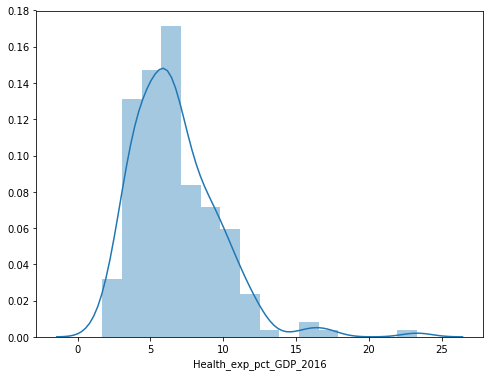

In [145]:
plt.figure(figsize=[8,6])
sns.distplot(WHS["Health_exp_pct_GDP_2016"])

In [162]:
print(df[df["Country_Region"] =="US"].Province_State)
print(df[df["Country_Region"] =="Italy"].Confirmed_Cases)


225                 Alabama
226                  Alaska
227                 Arizona
228                Arkansas
229              California
230                Colorado
231             Connecticut
232                Delaware
233    District of Columbia
234                 Florida
235                 Georgia
236                    Guam
237                  Hawaii
238                   Idaho
239                Illinois
240                 Indiana
241                    Iowa
242                  Kansas
243                Kentucky
244               Louisiana
245                   Maine
246                Maryland
247           Massachusetts
248                Michigan
249               Minnesota
250             Mississippi
251                Missouri
252                 Montana
253                Nebraska
254                  Nevada
255           New Hampshire
256              New Jersey
257              New Mexico
258                New York
259          North Carolina
260            North

In [159]:
print(df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Confirmed_Cases)

62    [444.0, 549.0, 761.0, 1058.0, 1423.0, 3554.0, ...
Name: Confirmed_Cases, dtype: object


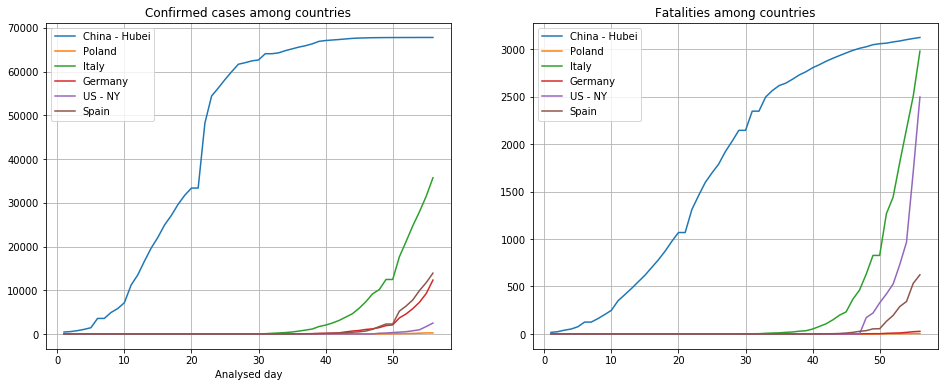

In [200]:
f, ax = plt.subplots(1, 2, figsize=[16, 6])

ax[0].plot(range(1, 57), df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Confirmed_Cases.values[0], label = "China - Hubei")
ax[0].plot(range(1, 57), df[df["Country_Region"] == "Poland"]["Confirmed_Cases"].values[0], label = "Poland")
ax[0].plot(range(1, 57), df[df["Country_Region"] == "Italy"]["Confirmed_Cases"].values[0], label = "Italy")
ax[0].plot(range(1, 57), df[df["Country_Region"] == "Germany"]["Confirmed_Cases"].values[0], label = "Germany")
ax[0].plot(range(1, 57), df[(df.Country_Region == "US") & (df.Province_State == "New York")].Confirmed_Cases.values[0], label = "US - NY")
ax[0].plot(range(1, 57), df[df["Country_Region"] == "Spain"]["Confirmed_Cases"].values[0], label = "Spain")
ax[0].set_title("Confirmed cases among countries")
ax[0].set_xlabel("Analysed day")
ax[0].legend()
ax[0].grid()

ax[1].plot(range(1, 57), df[(df.Country_Region == "China") & (df.Province_State == "Hubei")].Fatalities.values[0], label = "China - Hubei")
ax[1].plot(range(1, 57), df[df["Country_Region"] == "Poland"].Fatalities.values[0], label = "Poland")
ax[1].plot(range(1, 57), df[df["Country_Region"] == "Italy"].Fatalities.values[0], label = "Italy")
ax[1].plot(range(1, 57), df[df["Country_Region"] == "Germany"].Fatalities.values[0], label = "Germany")
ax[1].plot(range(1, 57), df[(df.Country_Region == "US") & (df.Province_State == "New York")].Confirmed_Cases.values[0], label = "US - NY")
ax[1].plot(range(1, 57), df[df["Country_Region"] == "Spain"].Fatalities.values[0], label = "Spain")
ax[1].set_title("Fatalities among countries")
ax[0].set_xlabel("Analysed day")
ax[1].legend()
ax[1].grid()